In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook
# 08/07/2024: Added continuous features, add discretizer and removed variables >=99% missing 
# 08/15/2024: Added viz_right_service_hf_yn variable

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions_v2 import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
fp_continuous = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_continuous.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

In [5]:
X_train_preprocessed, X_val_preprocessed, y_train, y_val = preprocess_continuous_features(fp_continuous, df_all)
#X_train_selected, X_val_selected = select_features(X_train_preprocessed, X_val_preprocessed, y_train)
#model_xgb = run_xgb_tune_fit_1b(X_train_selected, y_train, num_eval=20)

df_filt shape: (12771, 912)
X train_preprocessed shape: (10246, 852)
X val preprocessed shape: (2525, 852)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505


In [6]:
features_los = pd.read_excel(fp_continuous)

In [7]:
discrete_list = features_los[features_los['type'] == 'discrete']['col_name'].tolist()

In [8]:
discrete_list

['summary_consult_count_all',
 'summary_consult_count_unique_services',
 'con_signer_ym_provider_count',
 'con_signer_nemg_provider_count',
 'con_signer_community_provider_count',
 'con_service_addiction_medicine_count',
 'con_service_cardiology_count',
 'con_service_cardiothoracic_surgery_count',
 'con_service_colon_and_rectal_count',
 'con_service_dermatology_count',
 'con_service_diabetes_count',
 'con_service_gastroenterology_count',
 'con_service_geriatrics_count',
 'con_service_hematology_count',
 'con_service_hepatology_count',
 'con_service_hospitalist_service_count',
 'con_service_icu_sdu_count',
 'con_service_infectious_disease_count',
 'con_service_internal_medicine_count',
 'con_service_lab_medicine_count',
 'con_service_nephrology_count',
 'con_service_neuro_oncology_count',
 'con_service_neurology_count',
 'con_service_neurosurgery_count',
 'con_service_oncology_count',
 'con_service_ophthalmology_count',
 'con_service_orthopedics_count',
 'con_service_other_count',
 'con

In [17]:
X_train_raw_discrete = df_all.loc[X_train_preprocessed.index, discrete_list].fillna(0)

In [18]:
X_train_preprocessed_discrete = X_train_preprocessed[discrete_list]

In [25]:
df = X_train_raw_discrete.merge(X_train_preprocessed_discrete, on='pat_enc_csn_id')

In [26]:
df

summary_consult_count_all_x  \
pat_enc_csn_id                                
308893020                                 0   
308898101                                 0   
308903899                                 1   
308895656                                 1   
308899639                                 2   
...                                     ...   
343965134                                 2   
344021161                                 2   
344001799                                 0   
343977215                                 2   
344084226                                 0   

                summary_consult_count_unique_services_x  \
pat_enc_csn_id                                            
308893020                                             0   
308898101                                             0   
308903899                                             1   
308895656                                             1   
308899639                                             2   
...                                                 ...   
343965134                                             2   
344021161                                             1   
344001799                                             0   
343977215                                             1   
344084226                                             0   

                con_signer_ym_provider_count_x  \
pat_enc_csn_id                                   
308893020                                  0.0   
308898101                                  0.0   
308903899                                  1.0   
308895656                                  1.0   
308899639                                  2.0   
...                                        ...   
343965134                                  2.0   
344021161                                  0.0   
344001799                                  0.0   
343977215                                  0.0   
344084226                                  0.0   

                con_signer_nemg_provider_count_x  \
pat_enc_csn_id                                     
308893020                                    0.0   
308898101                                    0.0   
308903899                                    0.0   
308895656                                    0.0   
308899639                                    0.0   
...                                          ...   
343965134                                    0.0   
344021161                                    0.0   
344001799                                    0.0   
343977215                                    0.0   
344084226                                    0.0   

                con_signer_community_provider_count_x  \
pat_enc_csn_id                                          
308893020                                         0.0   
308898101                                         0.0   
308903899                                         0.0   
308895656                                         0.0   
308899639                                         0.0   
...                                               ...   
343965134                                         0.0   
344021161                                         0.0   
344001799                                         0.0   
343977215                                         2.0   
344084226                                         0.0   

                con_service_addiction_medicine_count_x  \
pat_enc_csn_id                                           
308893020                                          0.0   
308898101                                          0.0   
308903899                                          0.0   
308895656                                          0.0   
308899639                                          0.0   
...                                                ...   
343965134                                          0.0   
344021161                                   

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Identify raw value columns and category columns
raw_columns = [col for col in df.columns if col.endswith('_x')]
category_column = [col for col in df.columns if col.endswith('_y')][0]

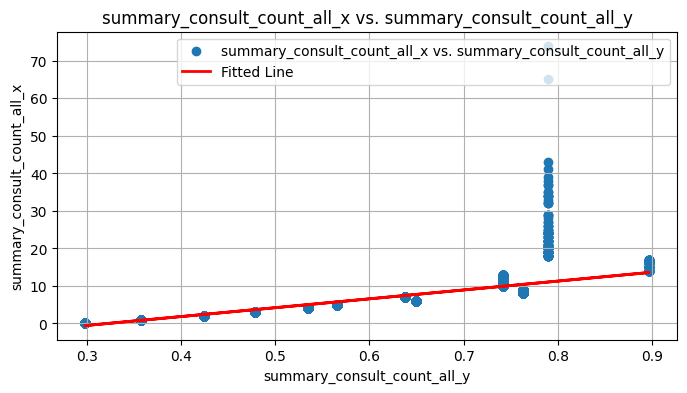

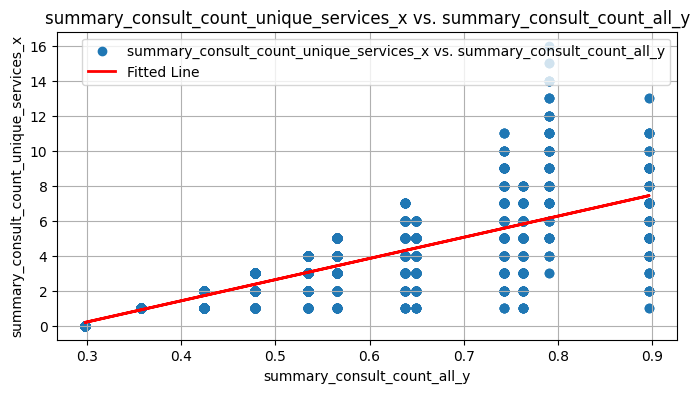

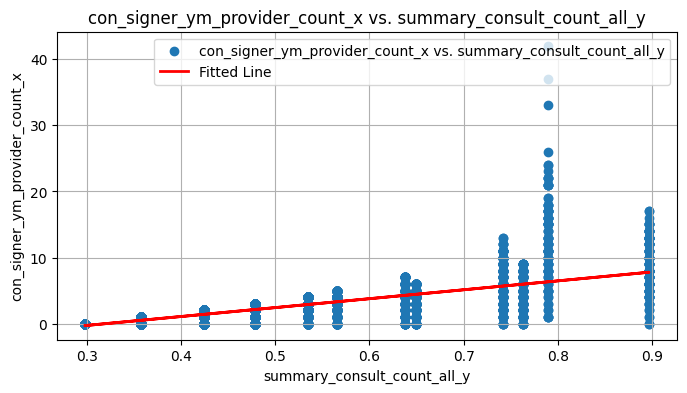

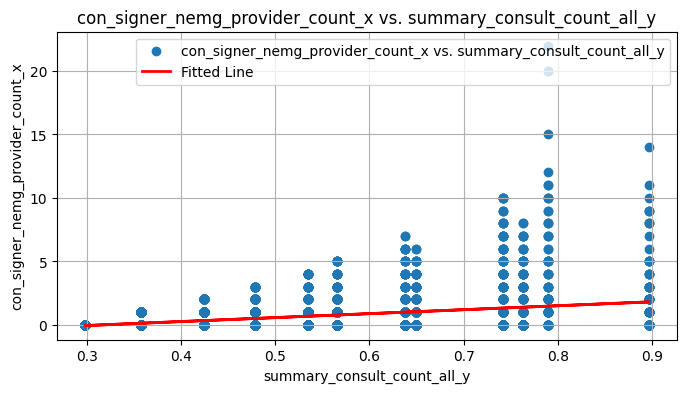

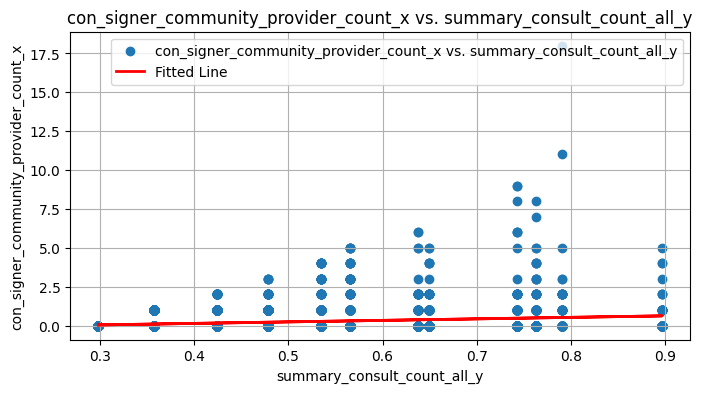

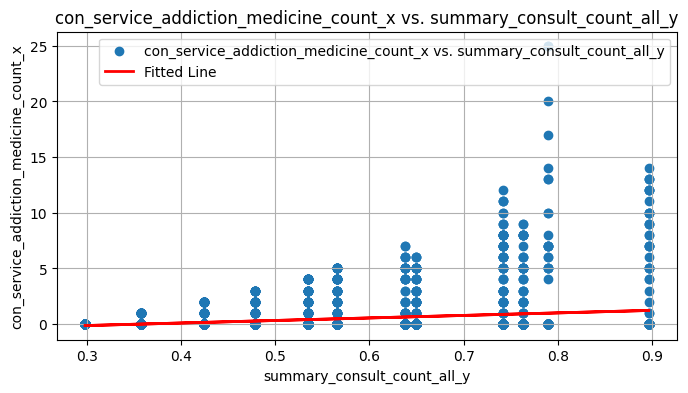

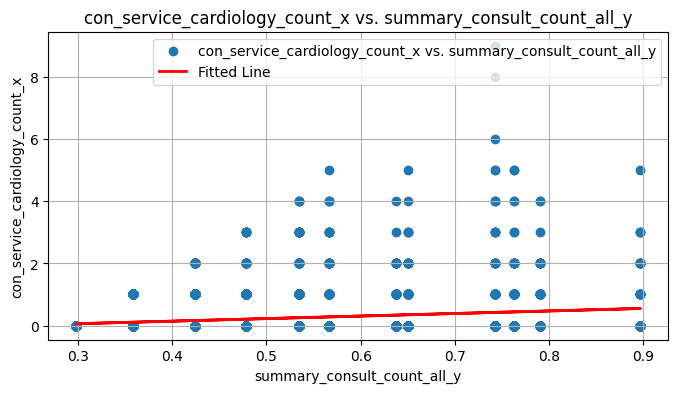

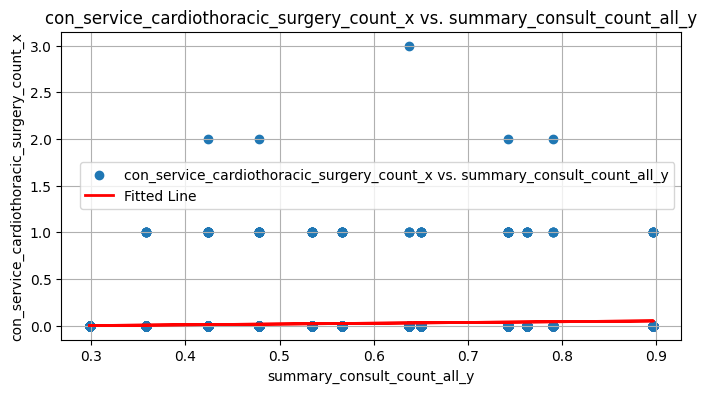

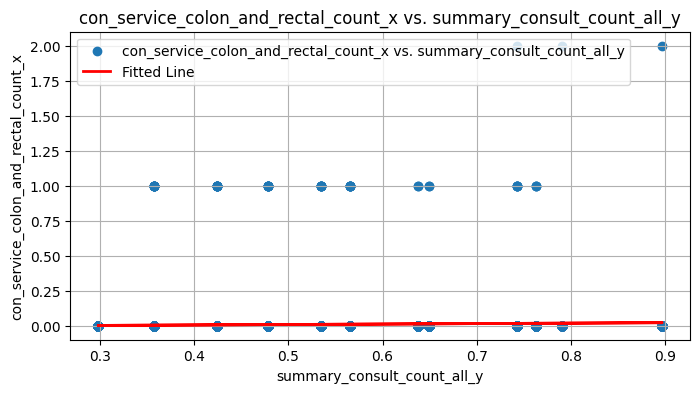

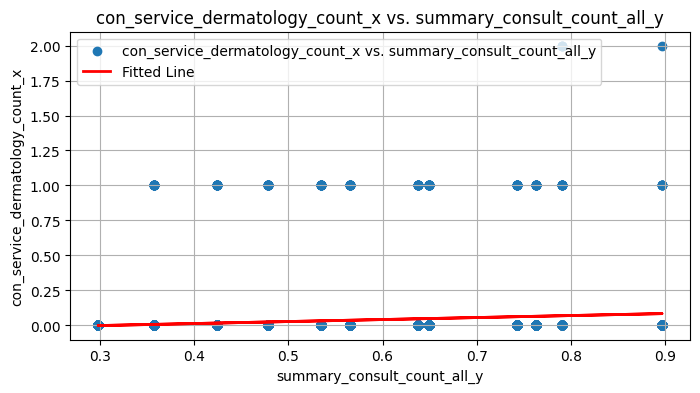

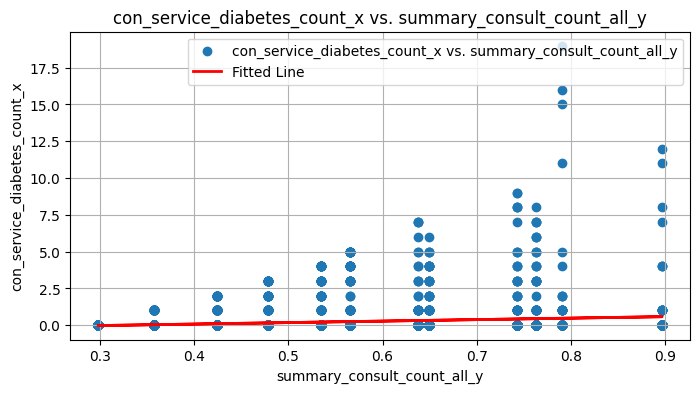

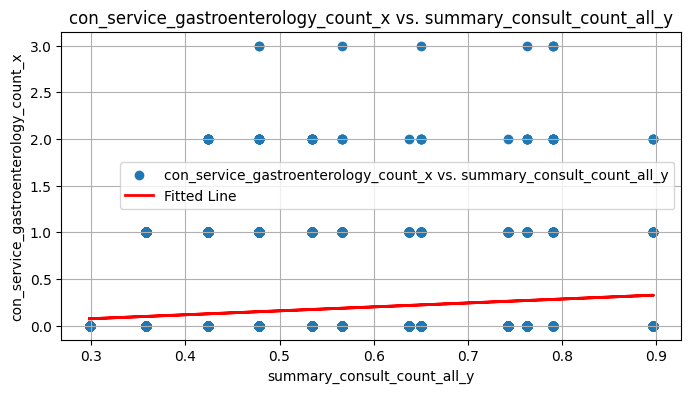

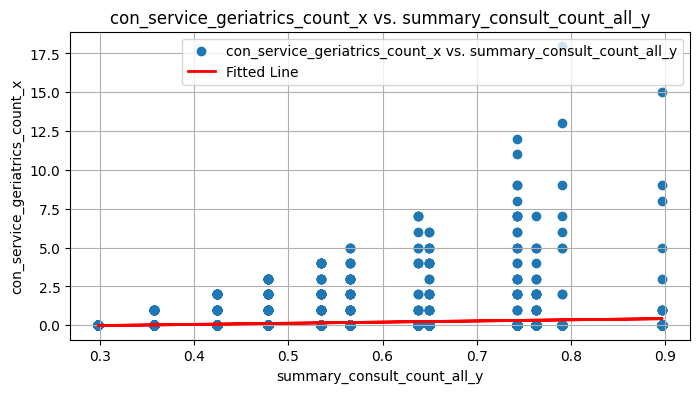

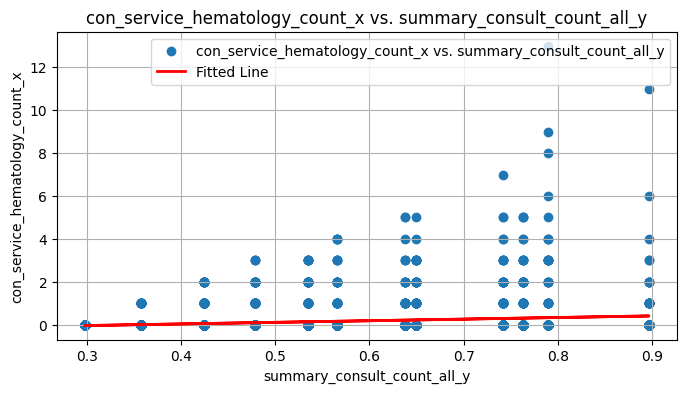

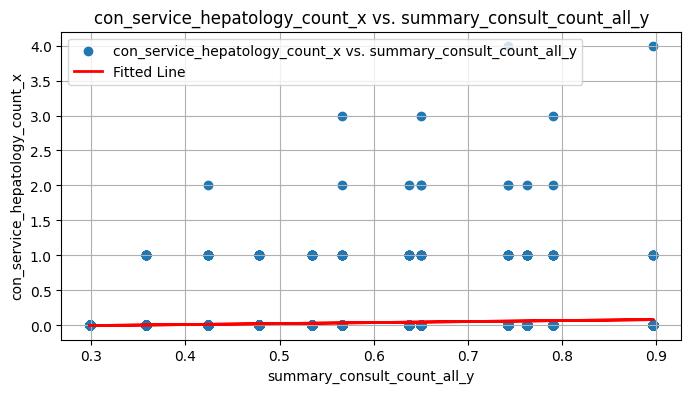

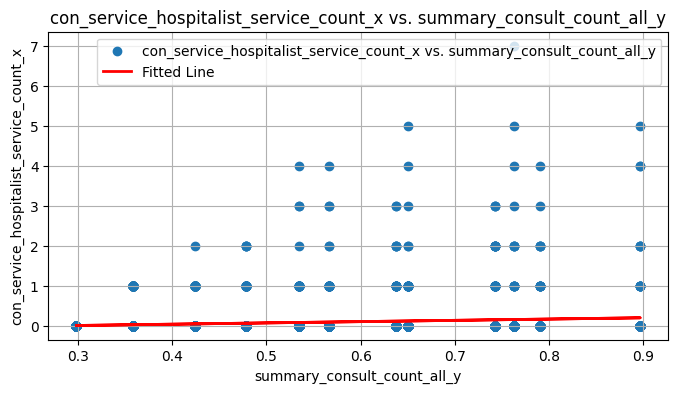

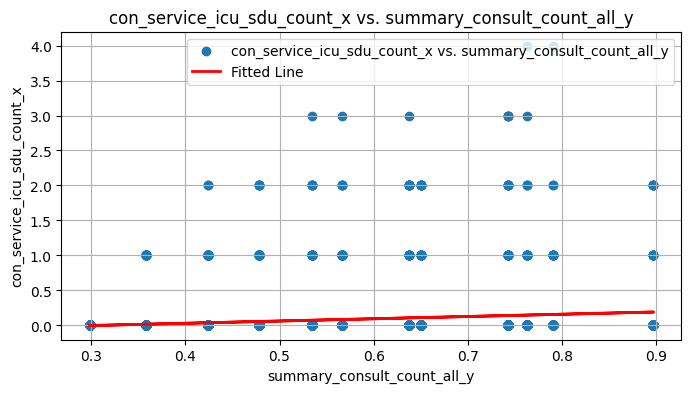

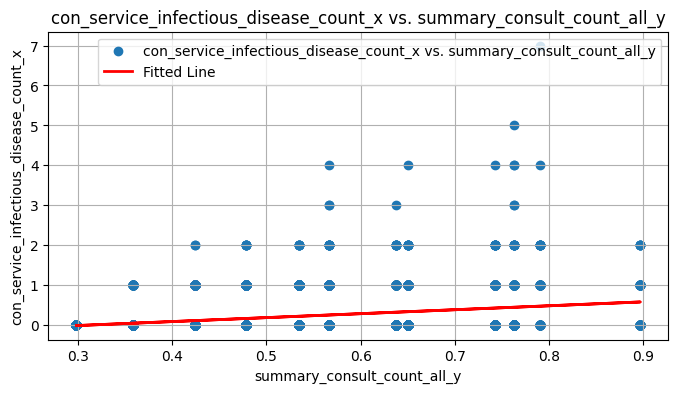

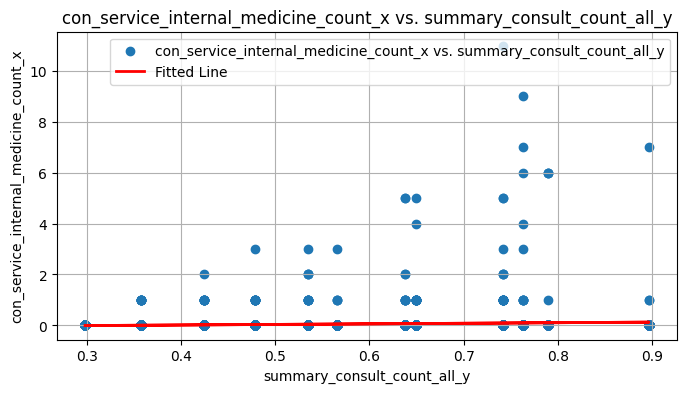

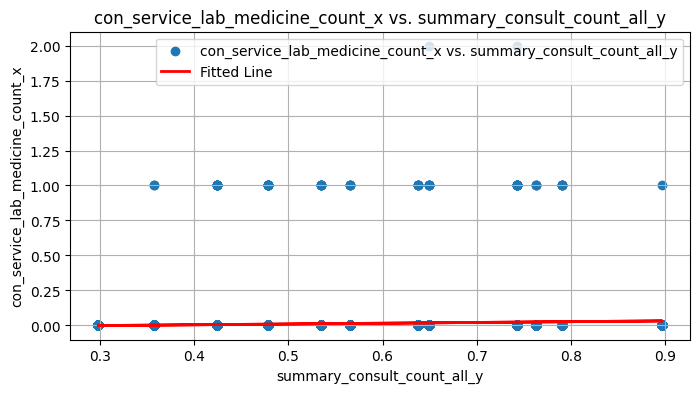

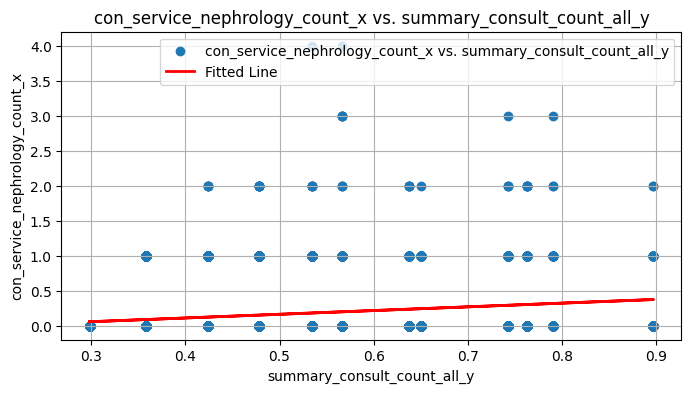

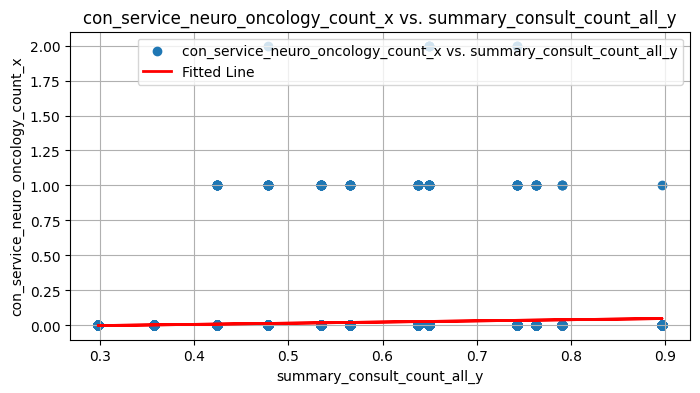

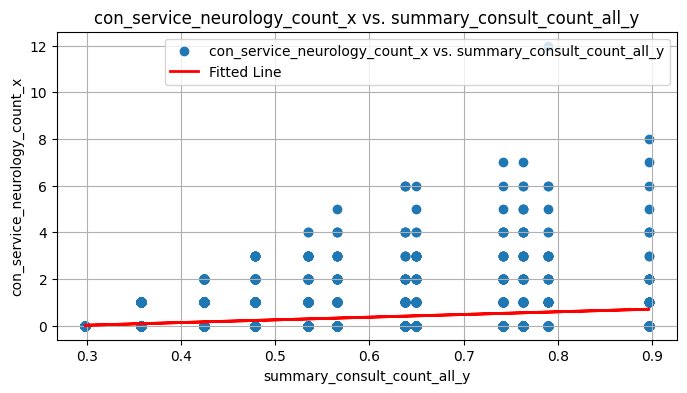

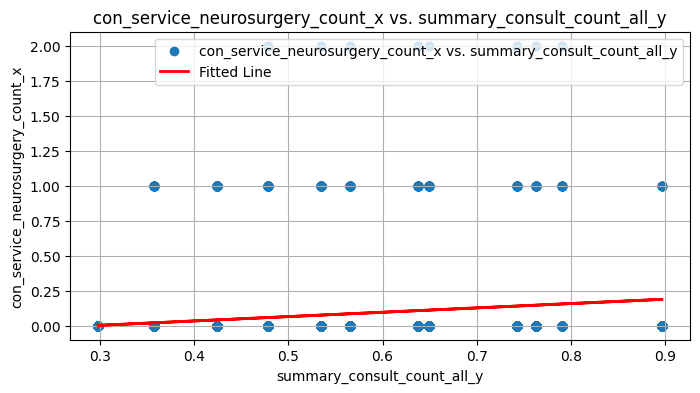

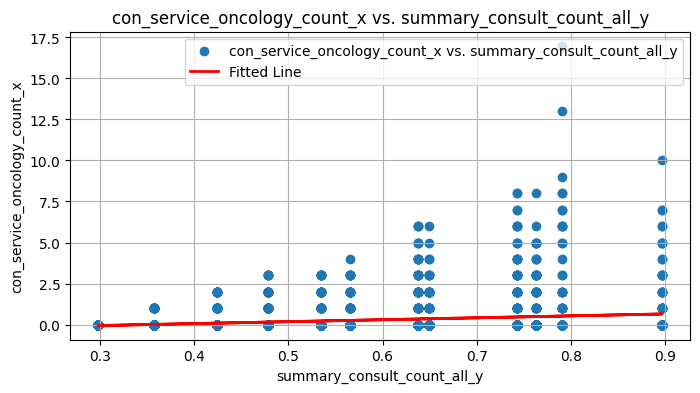

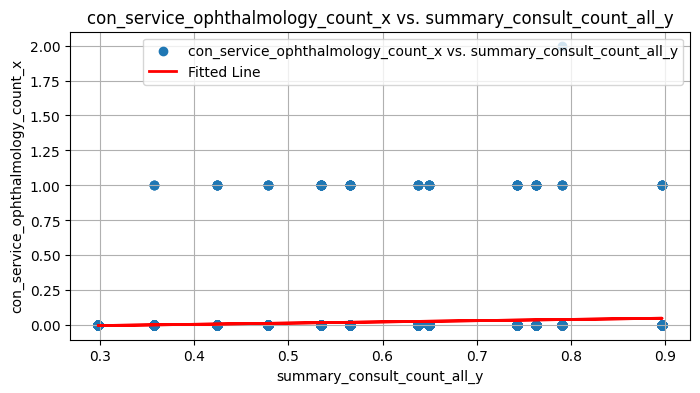

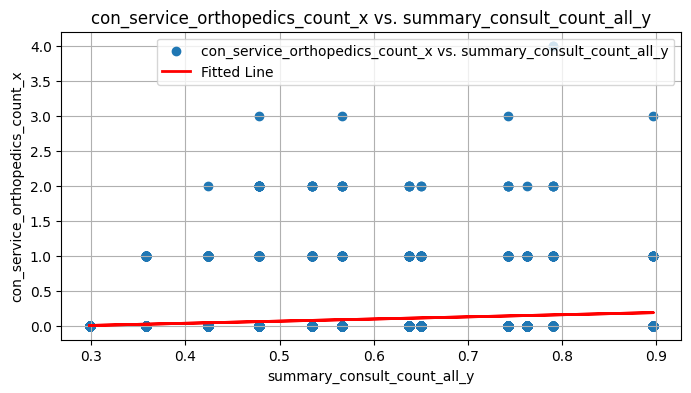

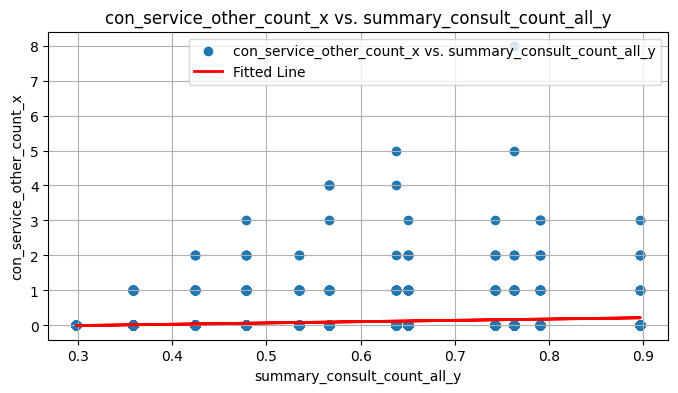

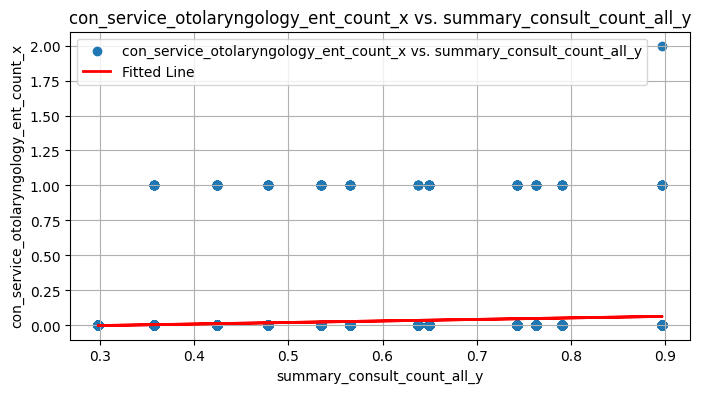

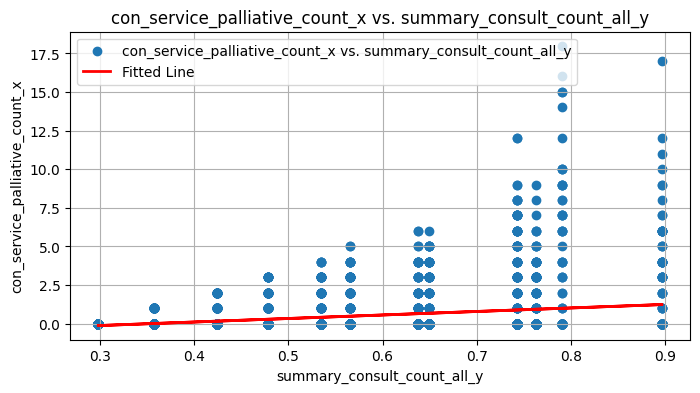

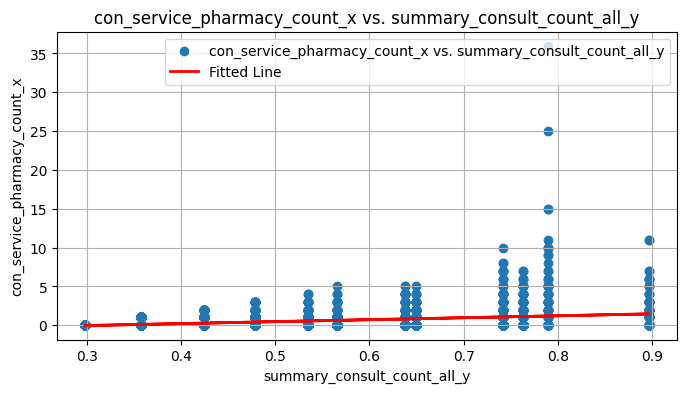

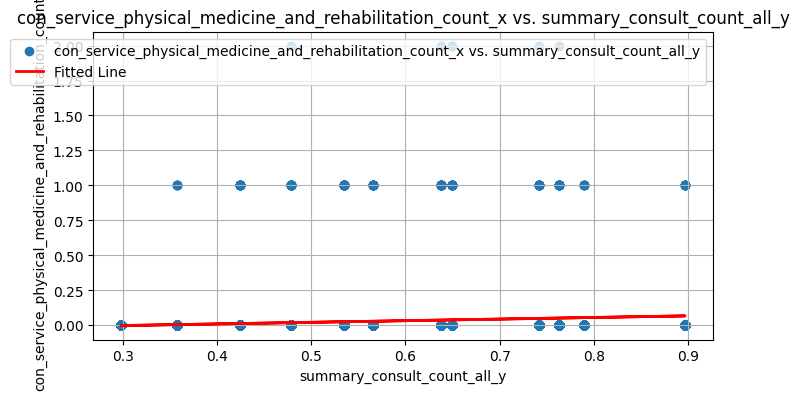

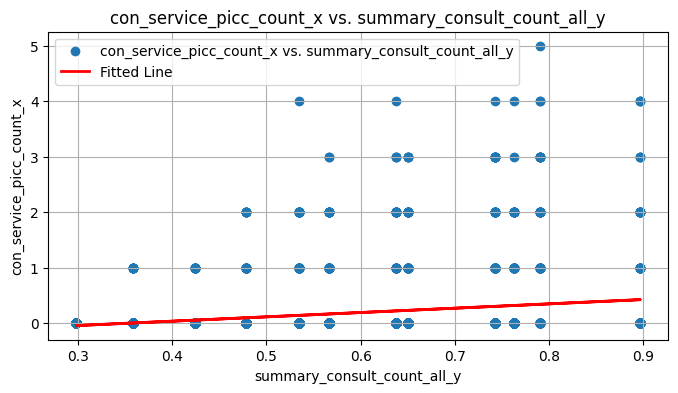

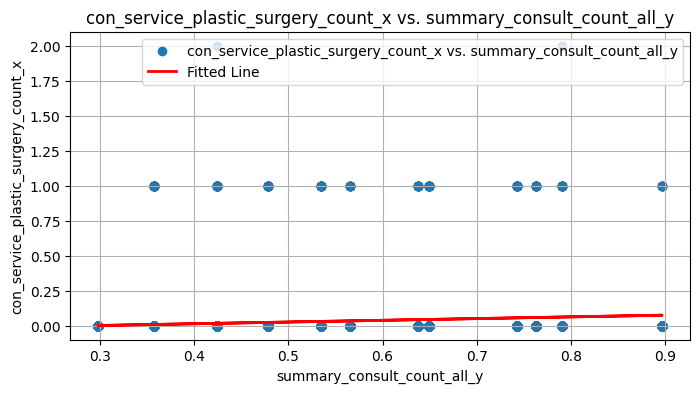

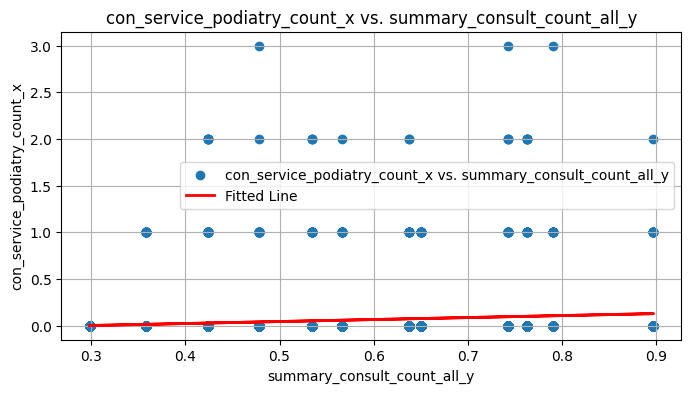

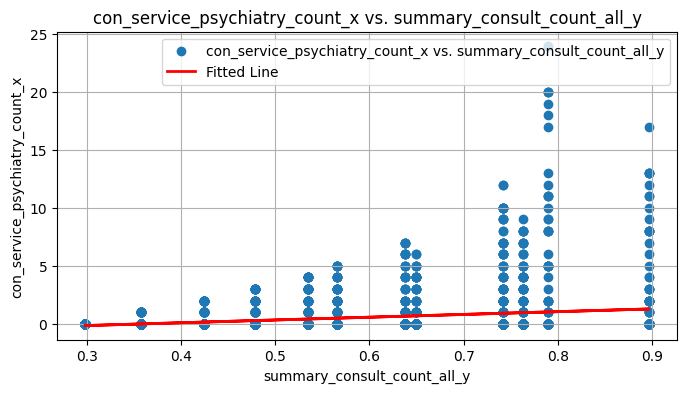

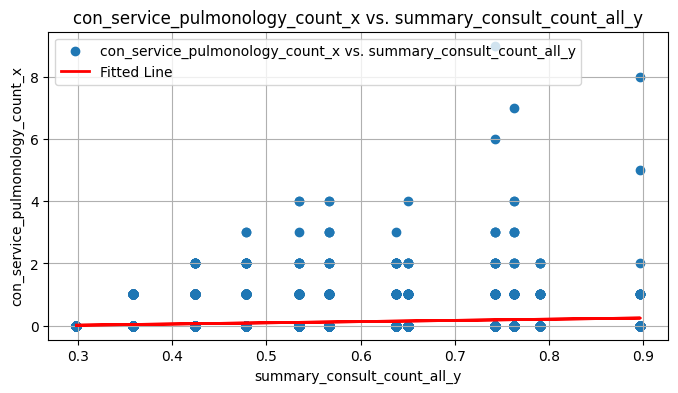

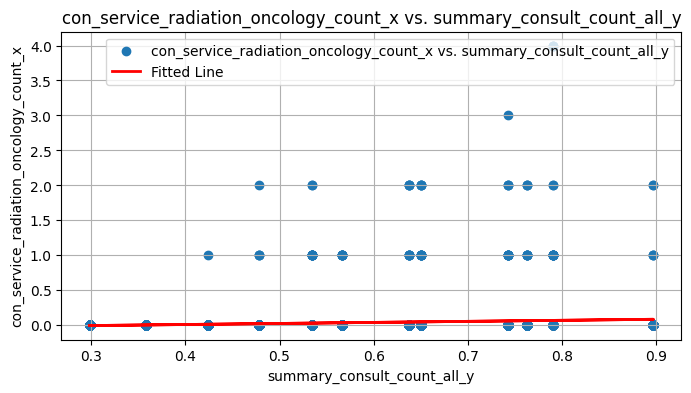

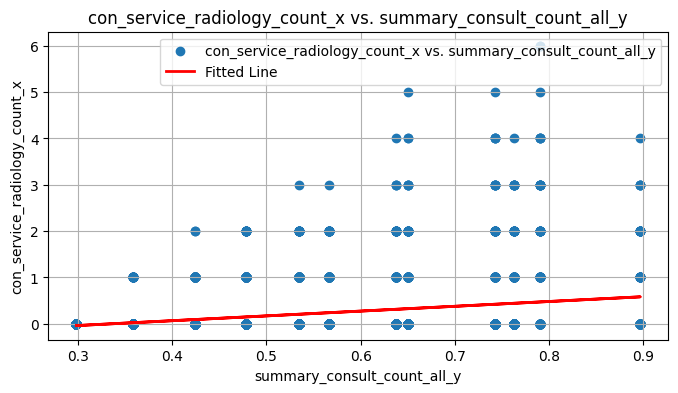

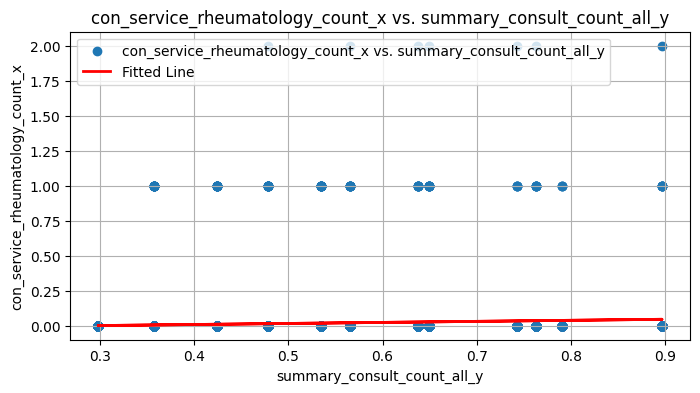

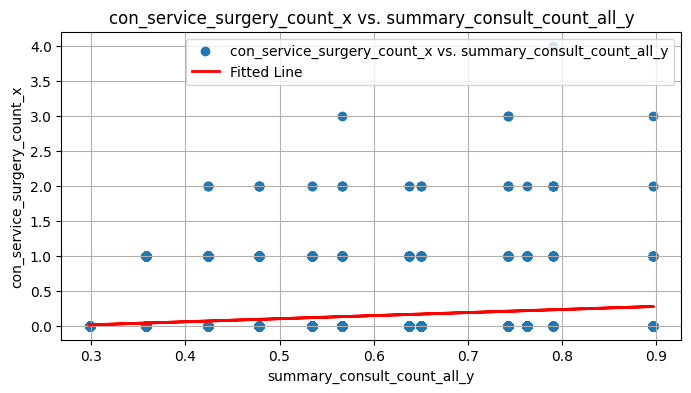

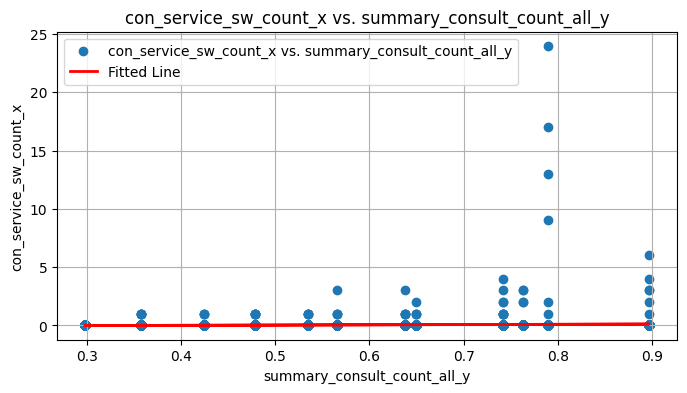

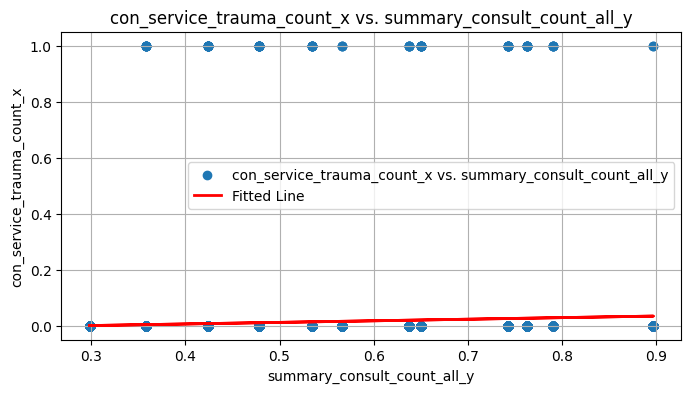

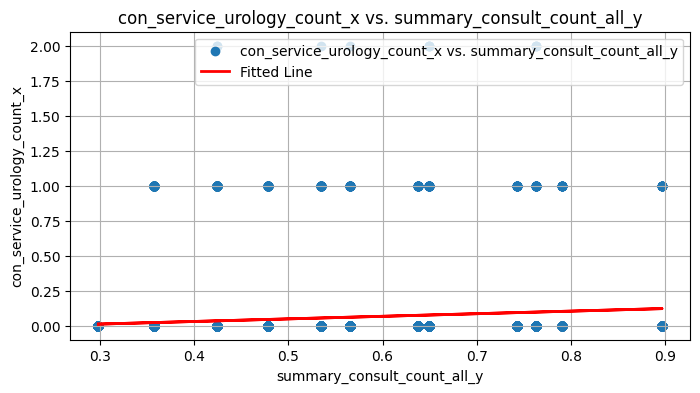

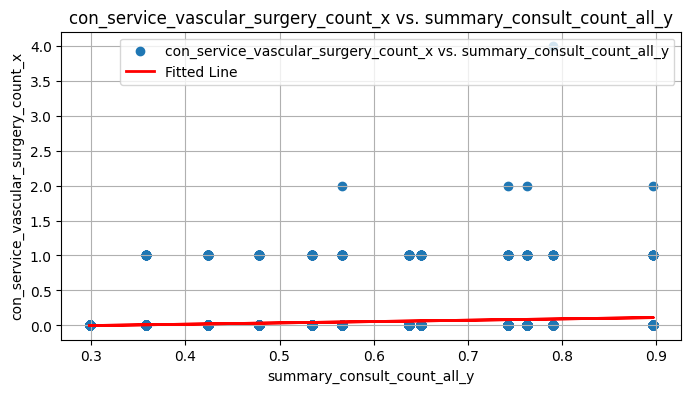

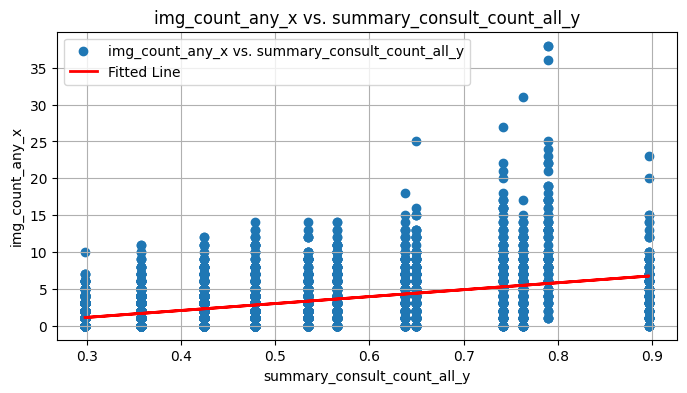

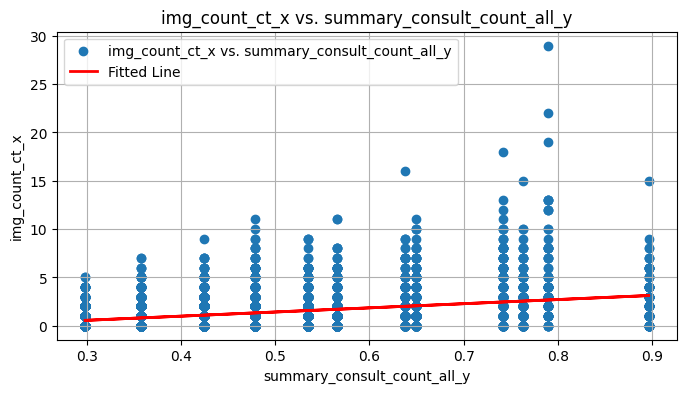

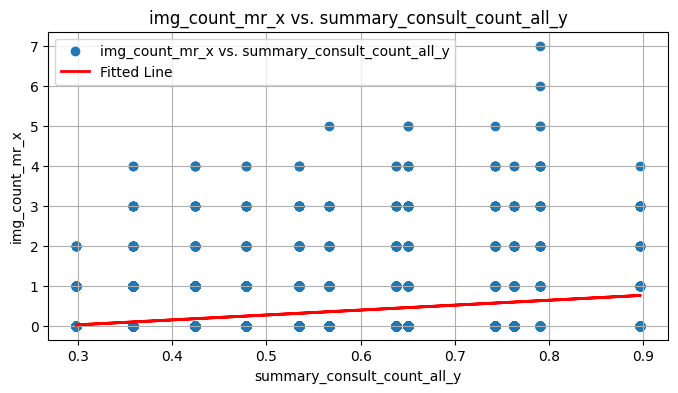

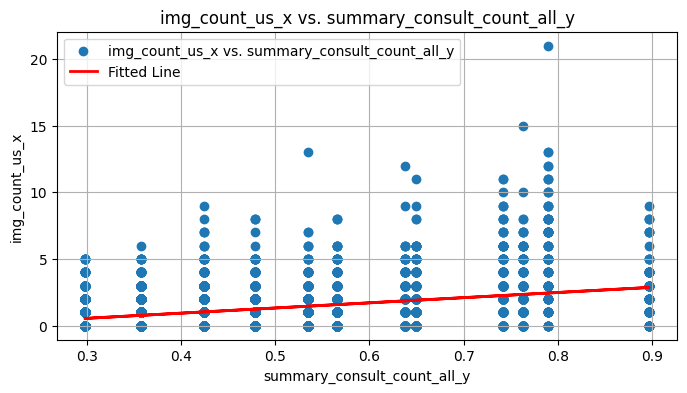

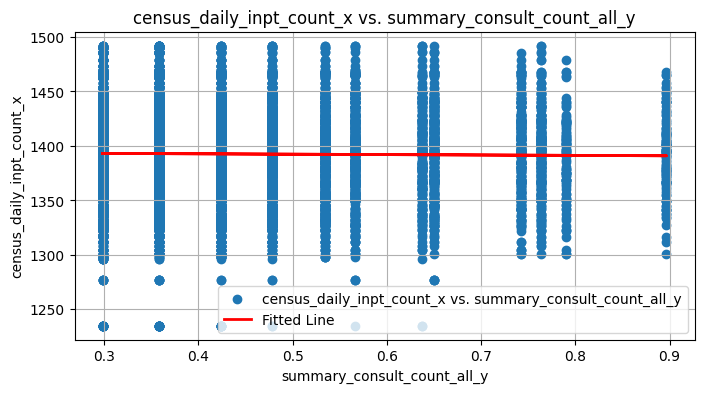

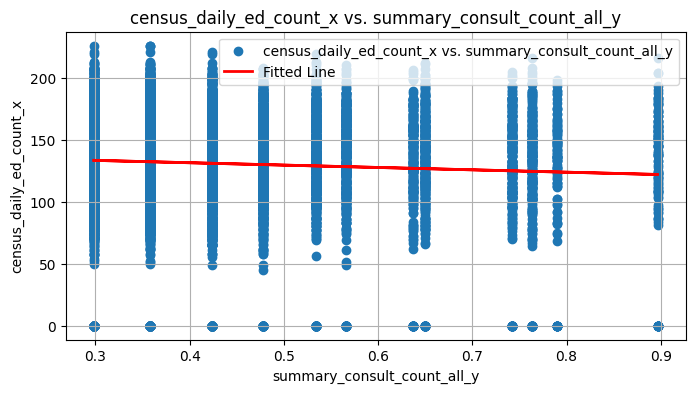

                                             Variable      Slope    Intercept
0                         summary_consult_count_all_x  23.621278    -7.617925
1             summary_consult_count_unique_services_x  12.104173    -3.427031
2                      con_signer_ym_provider_count_x  13.462794    -4.297943
3                    con_signer_nemg_provider_count_x   3.117073    -0.995058
4               con_signer_community_provider_count_x   0.973634    -0.249703
5              con_service_addiction_medicine_count_x   2.270909    -0.821004
6                      con_service_cardiology_count_x   0.819565    -0.185513
7          con_service_cardiothoracic_surgery_count_x   0.083463    -0.025400
8                con_service_colon_and_rectal_count_x   0.032789    -0.008727
9                     con_service_dermatology_count_x   0.143021    -0.044800
10                       con_service_diabetes_count_x   1.009617    -0.331860
11               con_service_gastroenterology_count_x   0.422254

In [29]:
def check_linear_relationship(df, raw_columns, category_column):
    results = []
    
    for raw_col in raw_columns:
        X = df[[category_column]].values
        y = df[raw_col].values
        
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        intercept = model.intercept_
        
        results.append({
            'Variable': raw_col,
            'Slope': slope,
            'Intercept': intercept
        })
        
        plt.figure(figsize=(8, 4))
        plt.scatter(df[category_column], df[raw_col], label=f'{raw_col} vs. {category_column}')
        plt.plot(df[category_column], model.predict(X), color='red', linewidth=2, label='Fitted Line')
        plt.title(f'{raw_col} vs. {category_column}')
        plt.xlabel(category_column)
        plt.ylabel(raw_col)
        plt.legend()
        plt.grid(True)
        plt.show()
        
    return pd.DataFrame(results)

# Run the function
results_df = check_linear_relationship(df, raw_columns, category_column)
print(results_df)

In [30]:
X_val_raw_discrete = df_all.loc[X_val_preprocessed.index, discrete_list].fillna(0)

In [31]:
X_val_preprocessed_discrete = X_val_preprocessed[discrete_list]

In [32]:
df2 = X_val_raw_discrete.merge(X_val_preprocessed_discrete, on='pat_enc_csn_id')

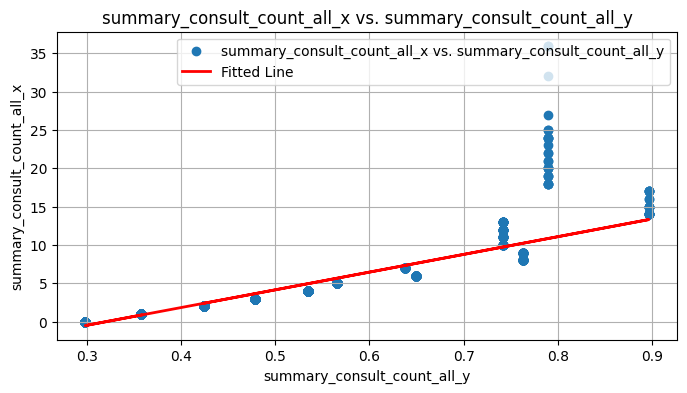

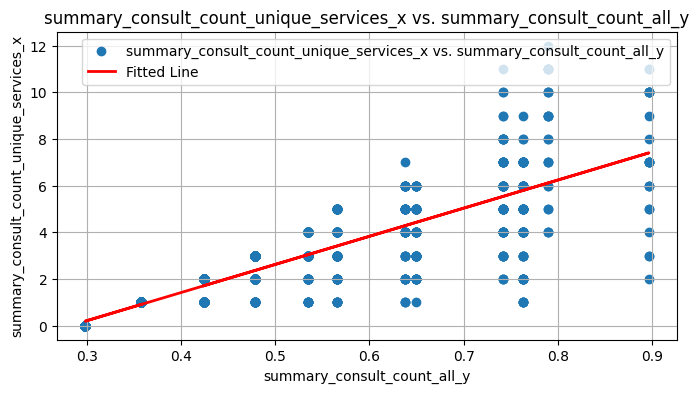

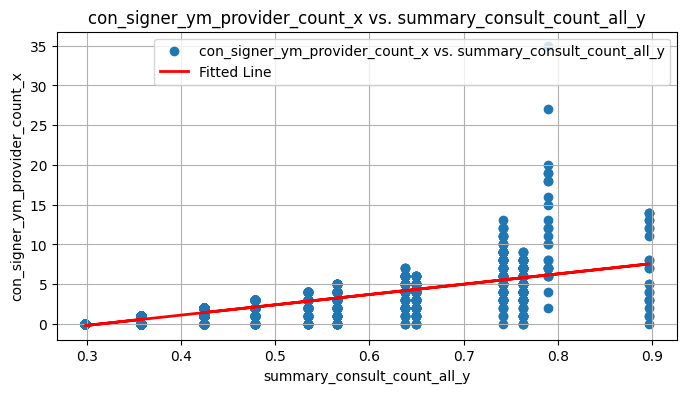

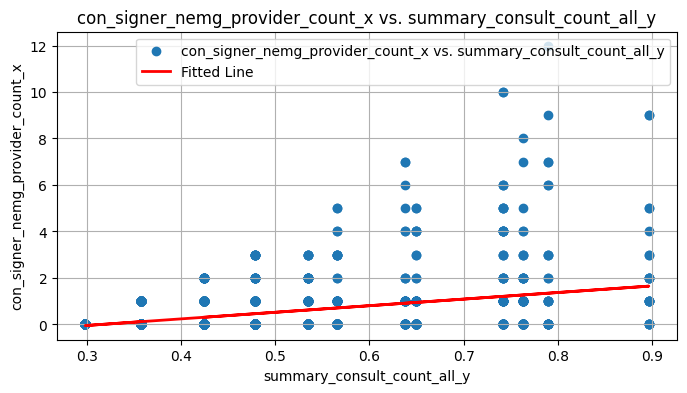

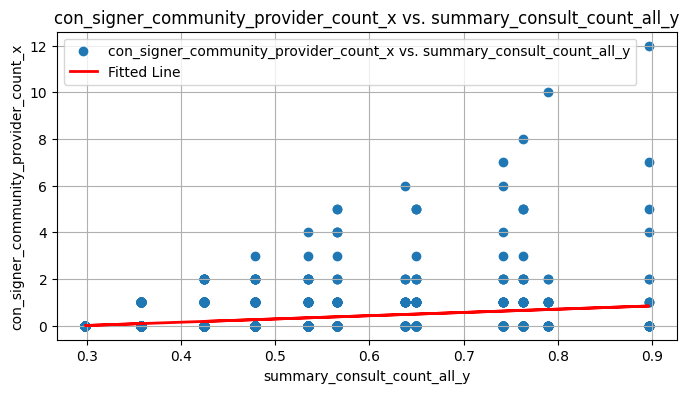

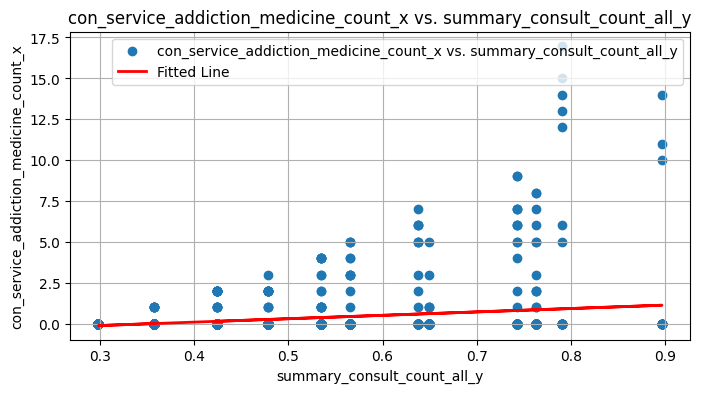

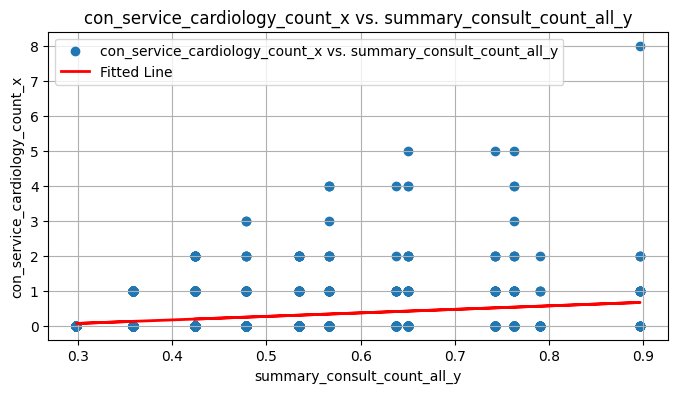

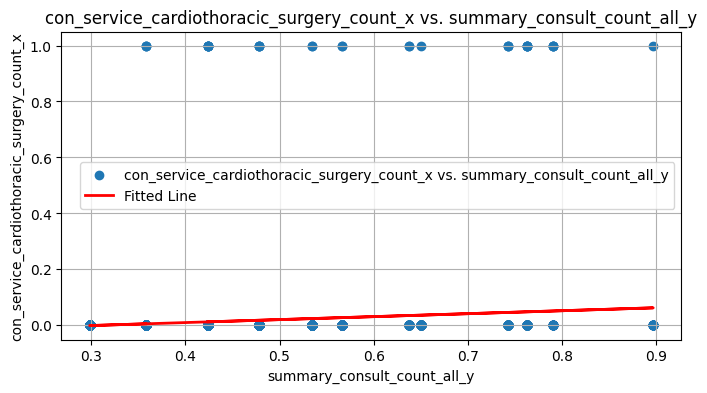

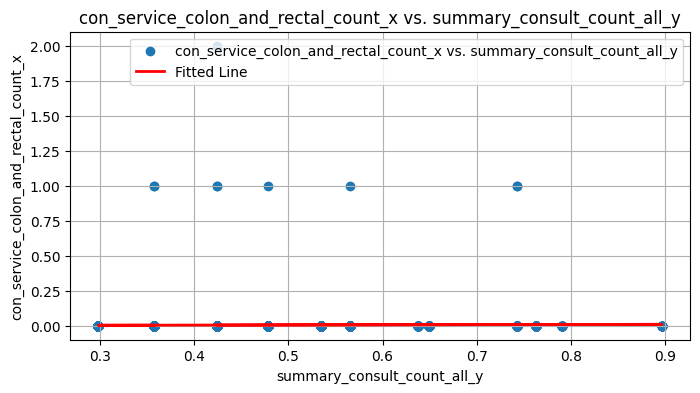

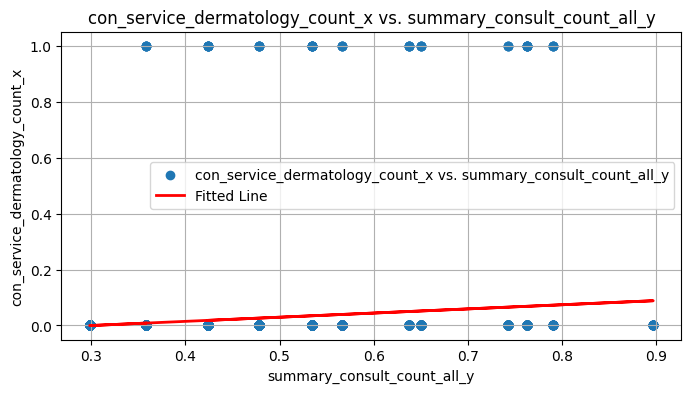

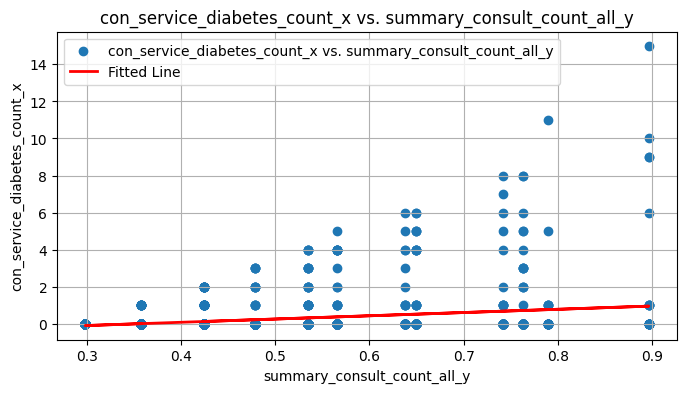

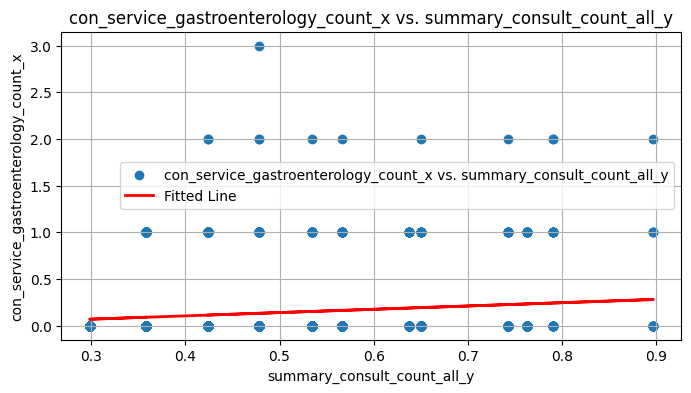

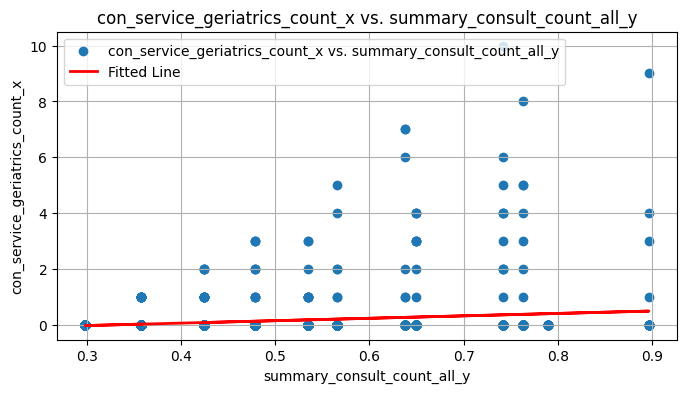

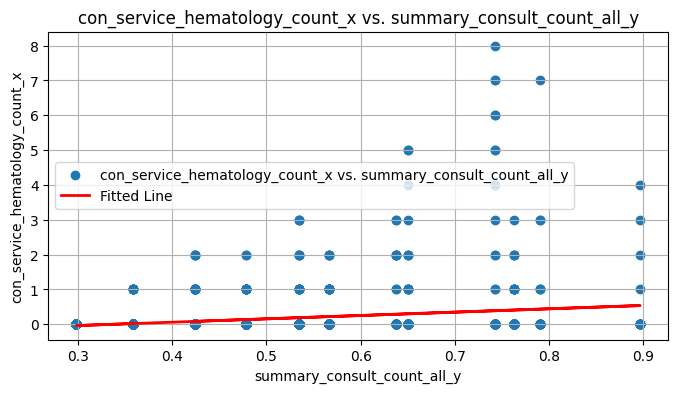

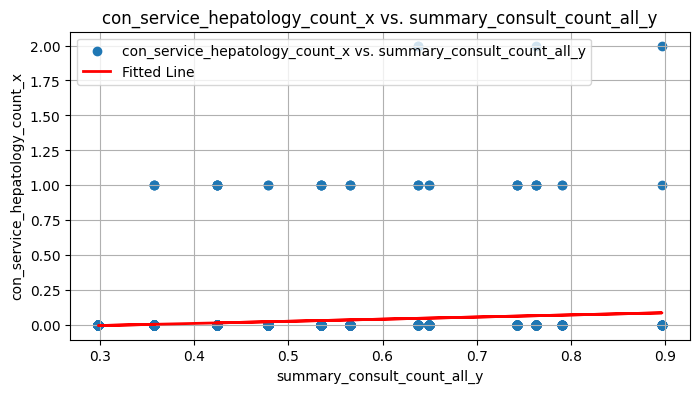

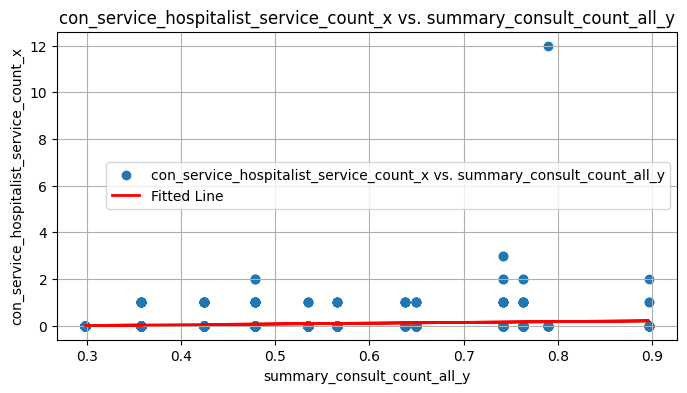

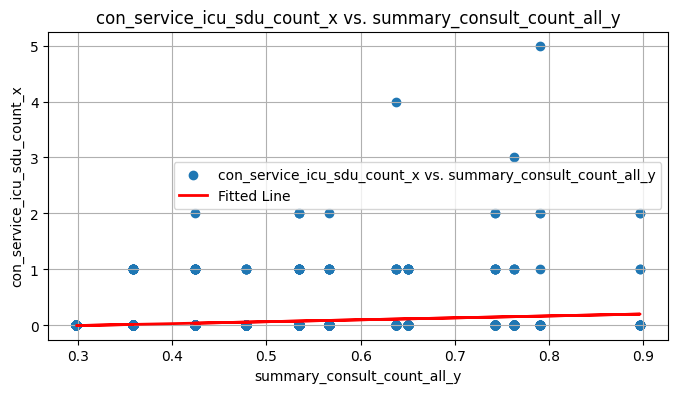

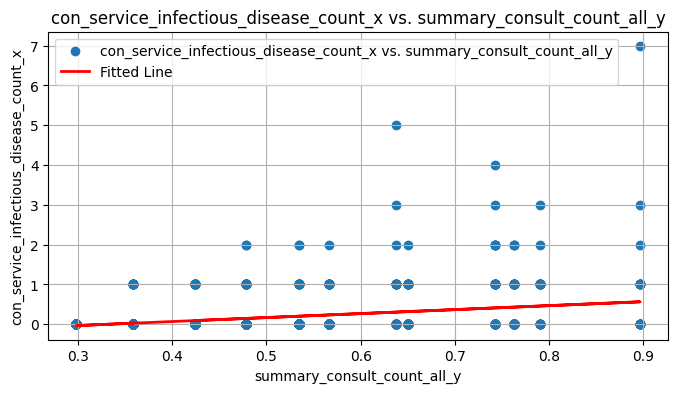

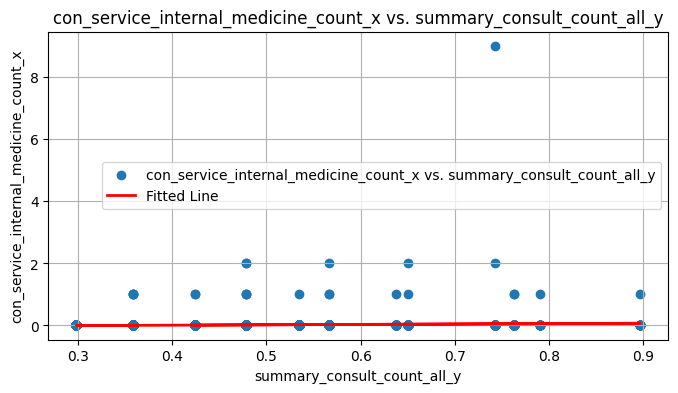

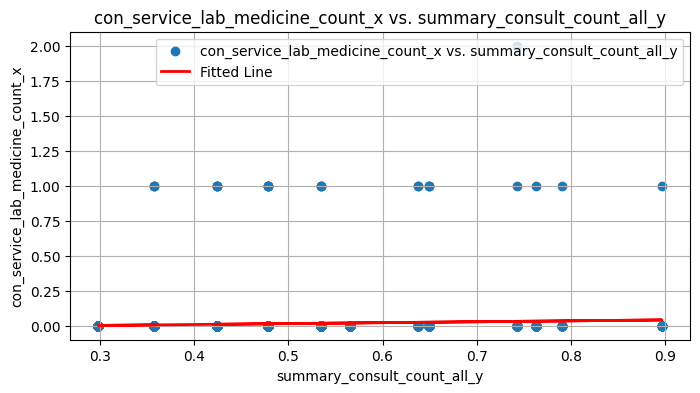

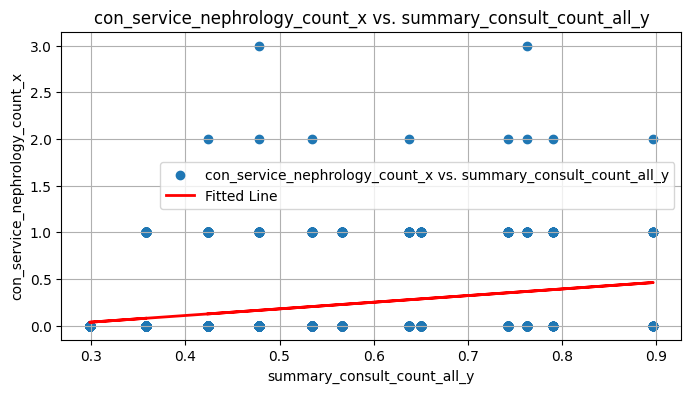

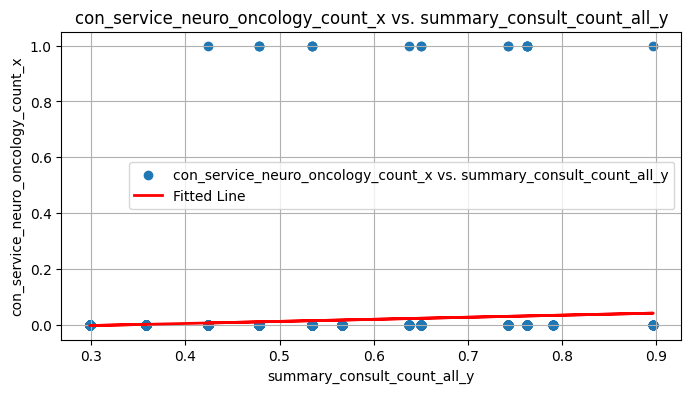

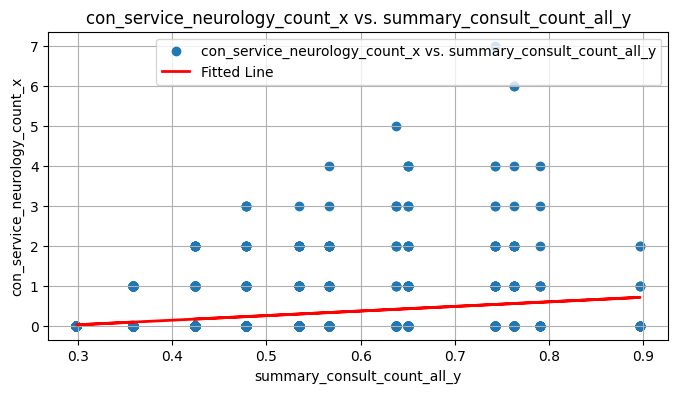

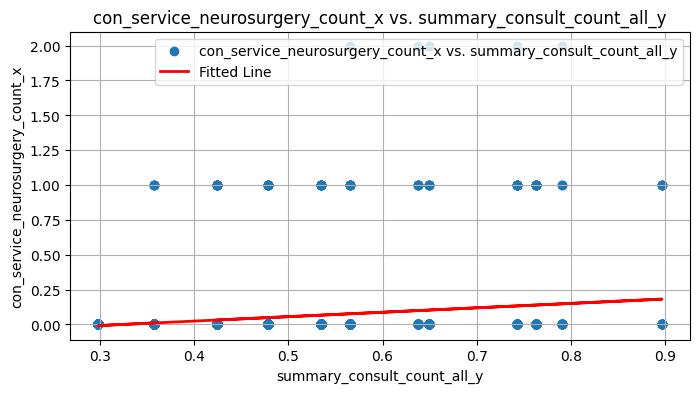

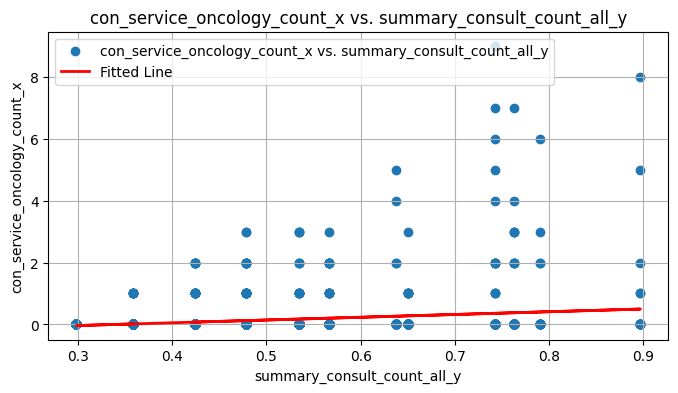

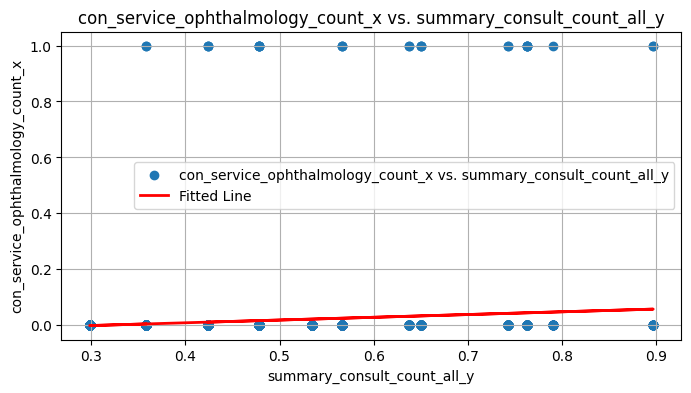

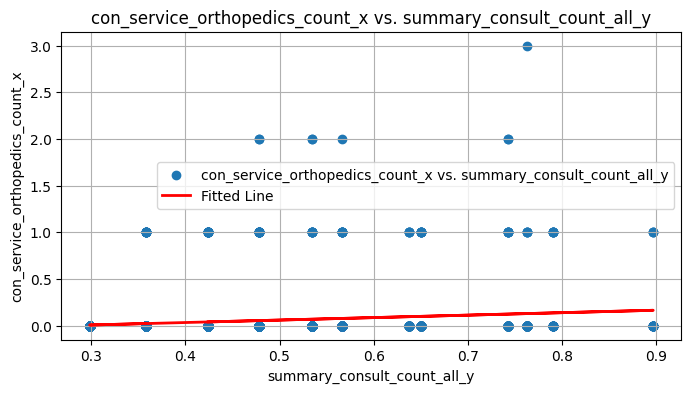

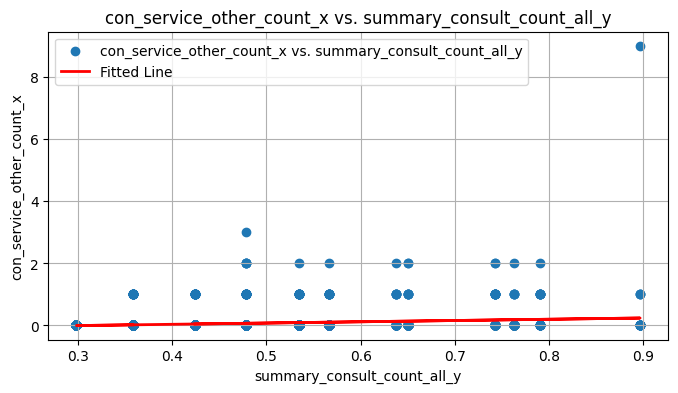

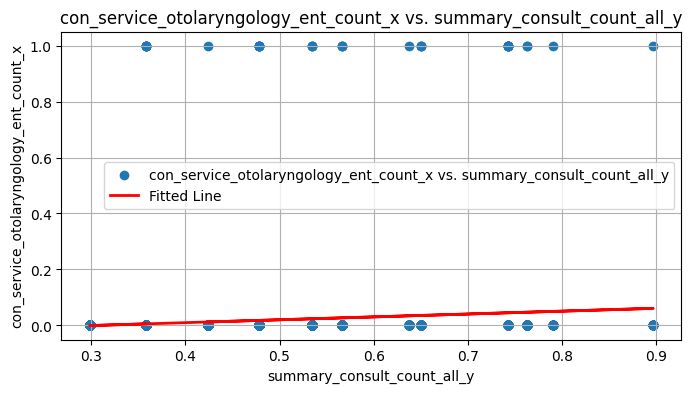

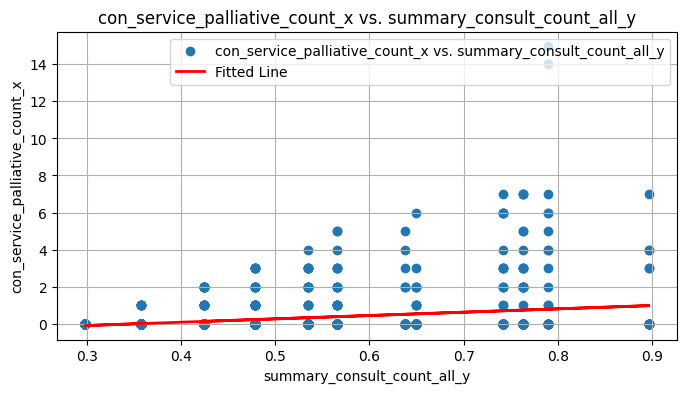

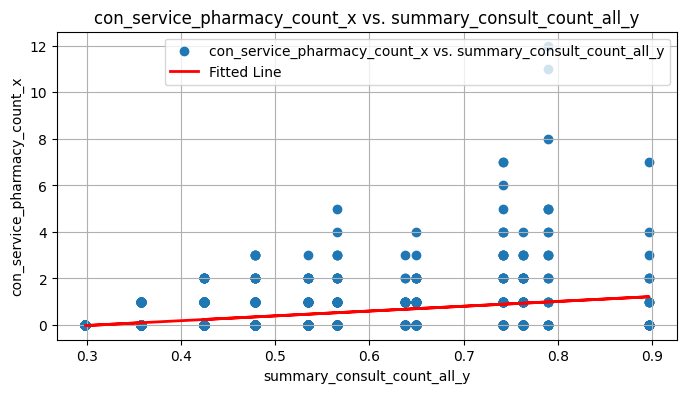

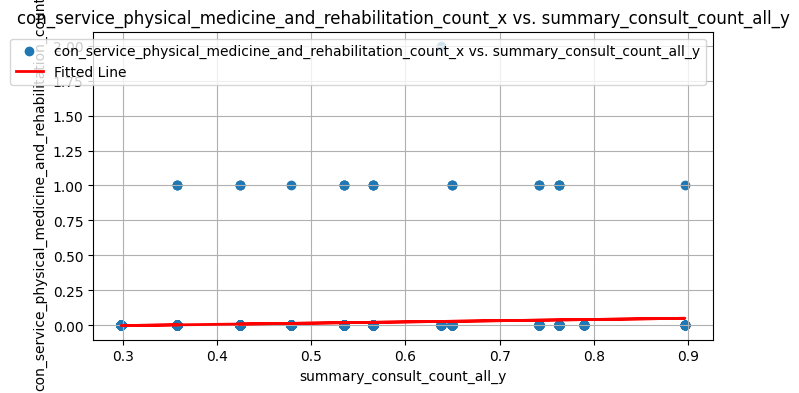

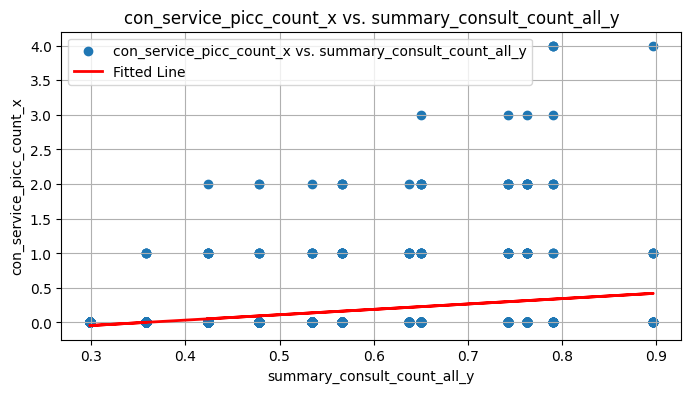

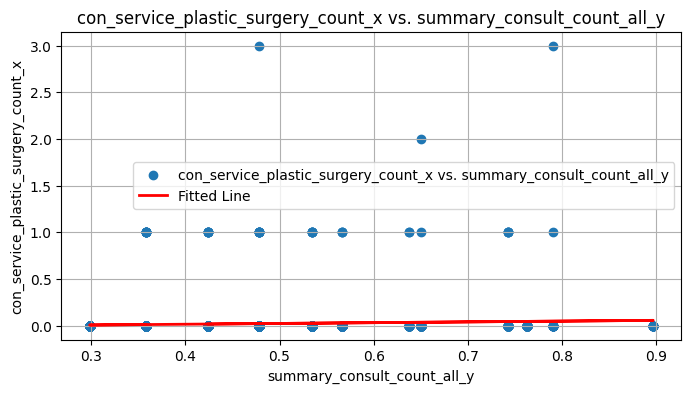

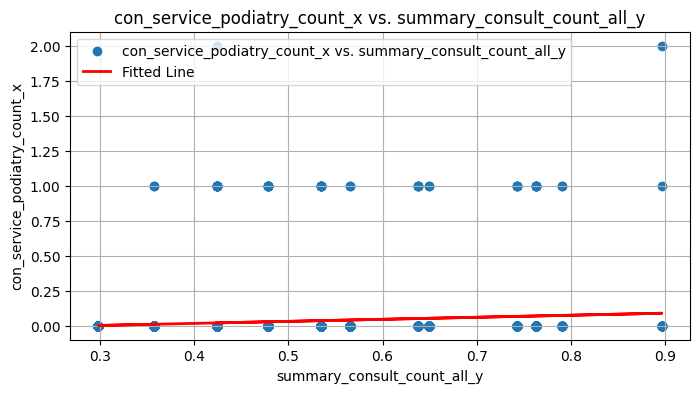

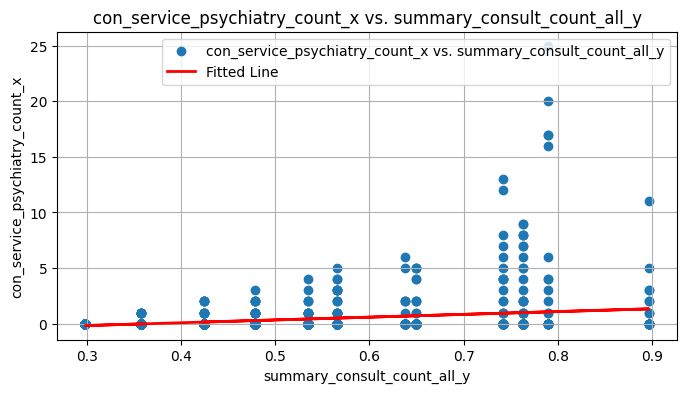

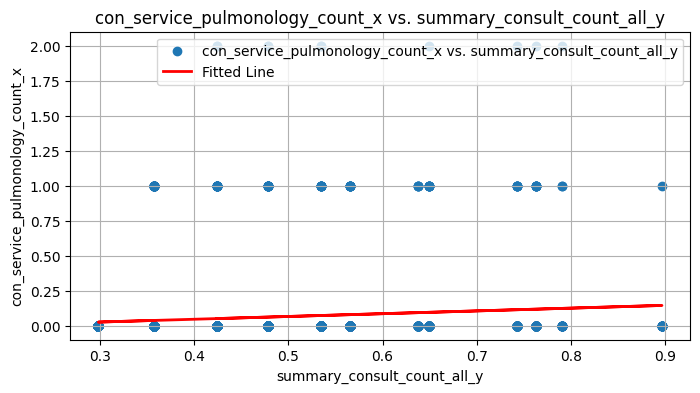

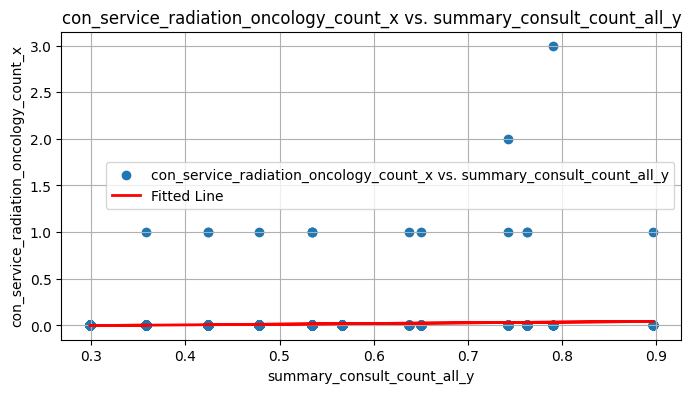

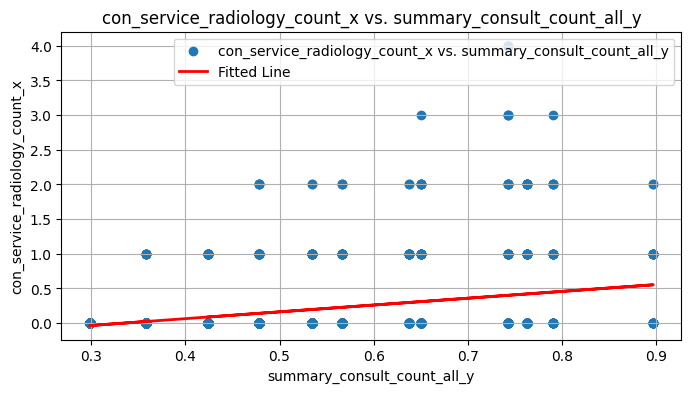

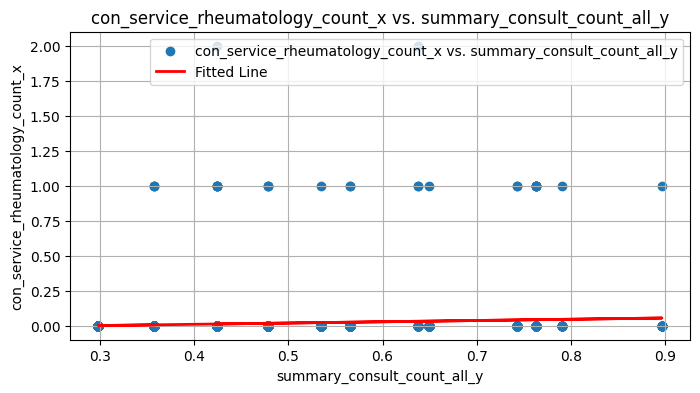

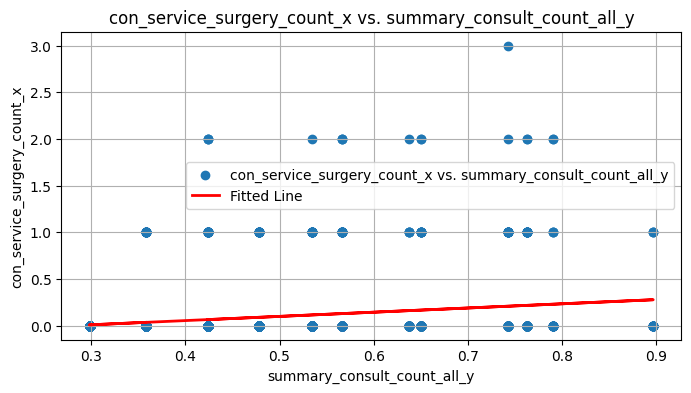

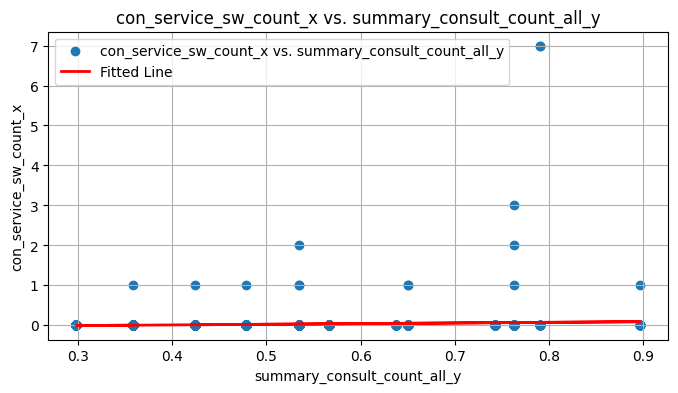

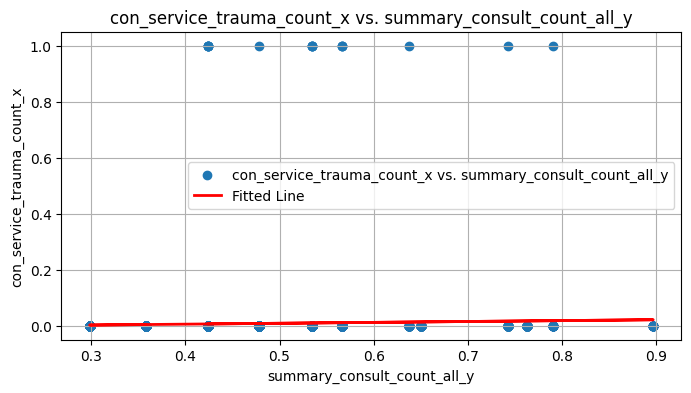

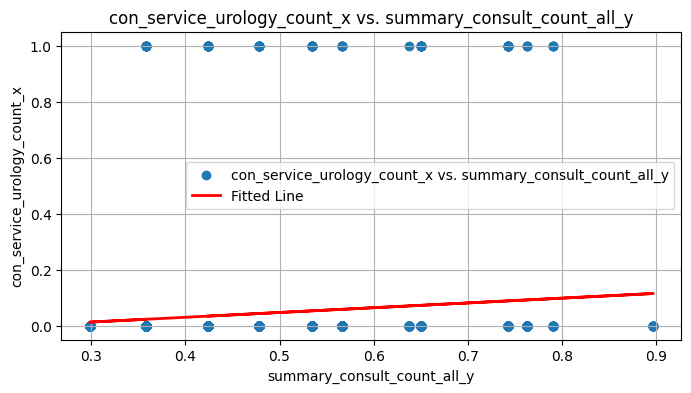

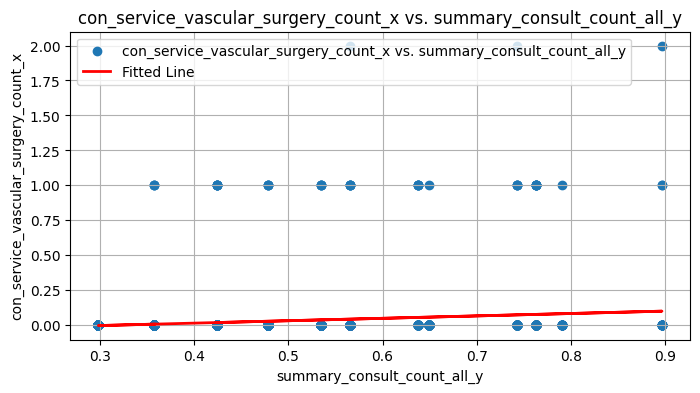

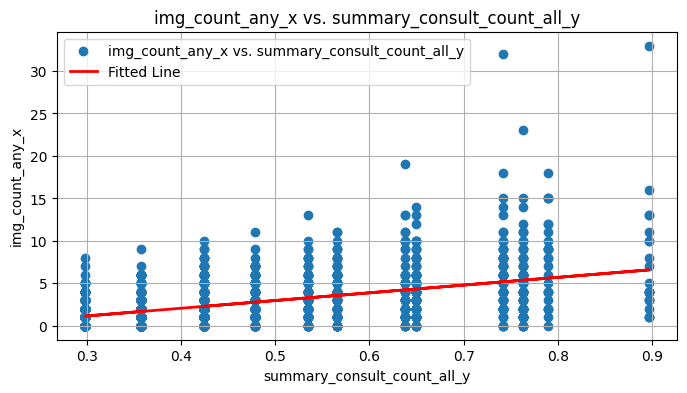

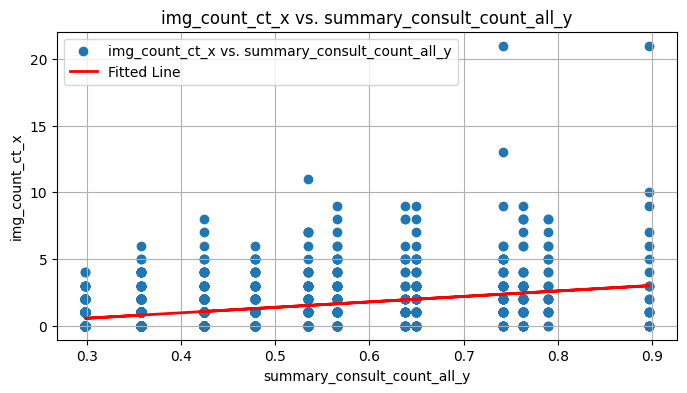

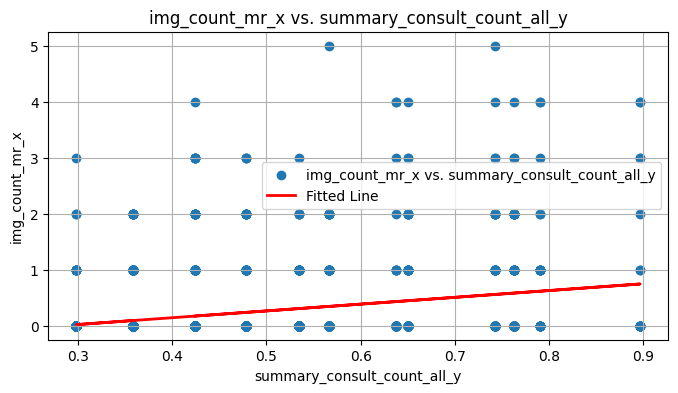

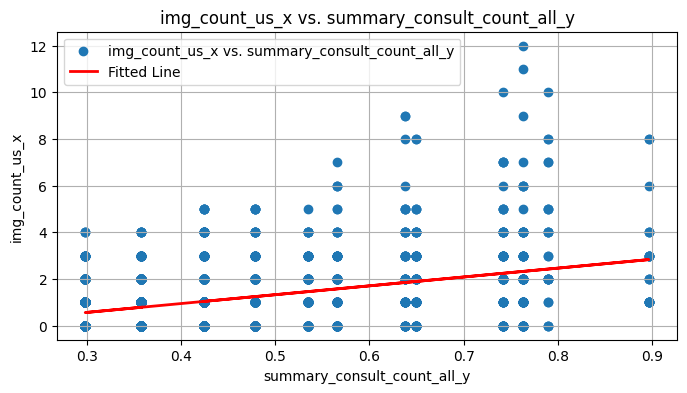

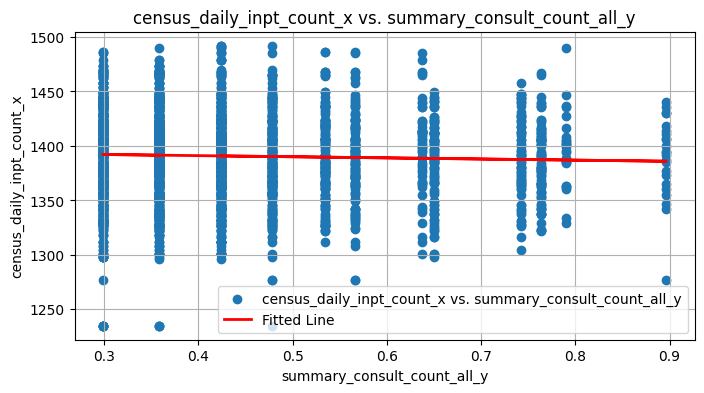

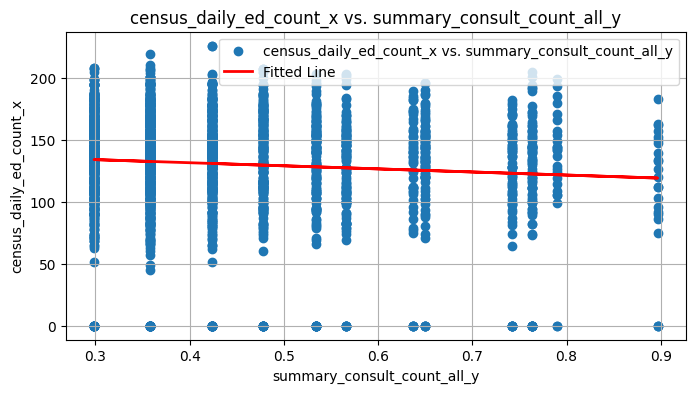

                                             Variable      Slope    Intercept
0                         summary_consult_count_all_x  23.123651    -7.428733
1             summary_consult_count_unique_services_x  12.058531    -3.409348
2                      con_signer_ym_provider_count_x  12.960871    -4.086009
3                    con_signer_nemg_provider_count_x   2.839013    -0.903849
4               con_signer_community_provider_count_x   1.397311    -0.414643
5              con_service_addiction_medicine_count_x   2.080978    -0.742900
6                      con_service_cardiology_count_x   1.004096    -0.239412
7          con_service_cardiothoracic_surgery_count_x   0.106075    -0.033560
8                con_service_colon_and_rectal_count_x   0.011020    -0.000884
9                     con_service_dermatology_count_x   0.148413    -0.044647
10                       con_service_diabetes_count_x   1.750320    -0.605862
11               con_service_gastroenterology_count_x   0.353155

In [33]:
results_df2 = check_linear_relationship(df2, raw_columns, category_column)
print(results_df2)